In [2]:
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;

In [3]:
benin_data = pd.read_csv("D:\\Projects\\MoonLight-Energy-Solutions\\Data\\benin.csv")

In [16]:
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [6]:
benin_data.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-08-08 23:56,-5.5,-0.1,-5.9,0.0,0.0,23.1,98.3,0.3,1.1,0.5,119.3,4.1,996,0,0.0,23.5,22.9,NaN
525596,2022-08-08 23:57,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.2,0.7,0.4,115.2,2.3,996,0,0.0,23.5,22.9,NaN
525597,2022-08-08 23:58,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.4,0.6,1.1,0.5,129.8,3.4,996,0,0.0,23.5,22.9,NaN
525598,2022-08-08 23:59,-5.5,-0.1,-5.8,0.0,0.0,23.1,98.3,0.9,1.3,0.5,124.4,4.3,996,0,0.0,23.5,22.9,NaN
525599,2022-08-09 00:00,-5.5,-0.1,-5.7,0.0,0.0,23.1,98.3,1.2,1.6,0.3,124.1,5.9,996,0,0.0,23.5,22.9,NaN


In [7]:
#Summary Statistics
benin_data.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [11]:
#Data Quality Check
#. 1. Looking for missing values
missing_value=benin_data.isnull().sum()
print(missing_value)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [39]:
negative_values=benin_data.loc[(benin_data['GHI']<0)|(benin_data['DNI']<0)|(benin_data['DHI']<0)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0       2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1       2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2       2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3       2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4       2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        WSstdev     WD  WDstdev   BP  C

In [35]:
negative_values = benin_data.loc[(benin_data['GHI']==5)]
print(negative_values)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
9039    2021-08-15 06:40  5.0  0.1  5.0   6.0   6.0  23.9   98.8  1.7     1.9   
12543   2021-08-17 17:04  5.0  0.0  5.2   8.2   8.1  26.8   87.3  3.0     3.9   
14820   2021-08-19 07:01  5.0 -0.1  5.7  10.5  10.5  21.6  100.0  0.0     0.0   
15539   2021-08-19 19:00  5.0 -0.4  5.0   5.5   5.5  26.4   84.1  0.0     0.0   
23441   2021-08-25 06:42  5.0  3.7  5.0   5.6   5.5  22.6   97.9  0.1     0.7   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
504398  2022-07-25 06:39  5.0 -0.2  5.0   5.1   5.1  24.7   95.4  1.4     2.4   
513100  2022-07-31 07:41  5.0 -0.3  5.0   6.8   6.8  21.1   97.3  3.6     5.1   
525190  2022-08-08 17:11  5.0 -0.2  5.0   6.4   6.3  22.2   98.9  5.0     7.2   
525191  2022-08-08 17:12  5.0 -0.3  5.0   6.5   6.4  22.2   98.9  5.3     6.4   
525282  2022-08-08 18:43  5.0 -0.1  4.2   8.7   8.5  22.5   98.4  1.6     2.1   

        WSstdev     WD  WDs

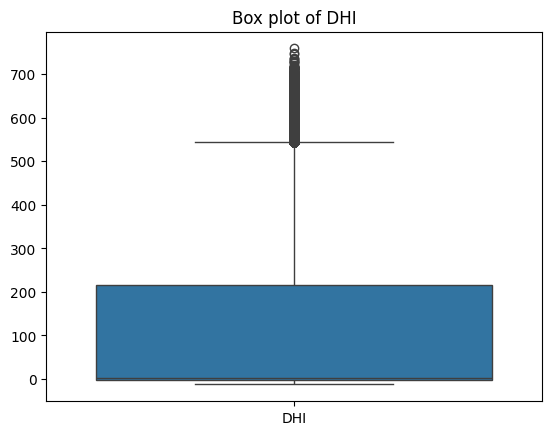

In [49]:
# Data Quality Check
# 3. Outlier Detection
sns.boxplot([benin_data['DHI']])
plt.title("Box plot of DHI")
plt.show()

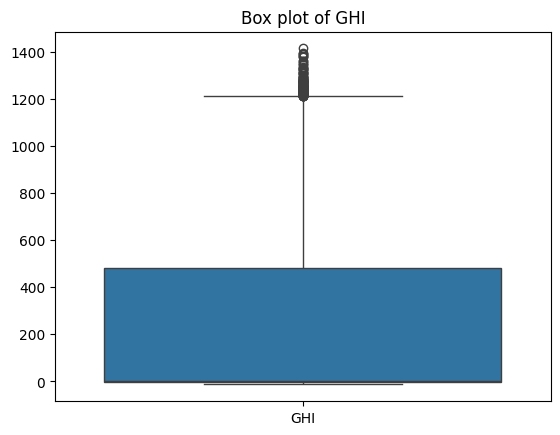

In [5]:
sns.boxplot([benin_data['GHI']])
plt.title("Box plot of GHI")
plt.show()

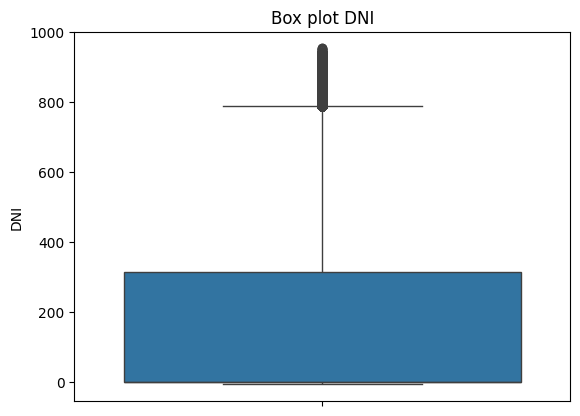

In [6]:
sns.boxplot(benin_data['DNI'])
plt.title("Box plot DNI")
plt.show()

In [7]:
# Time Series Analysis DHI
benin_data.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


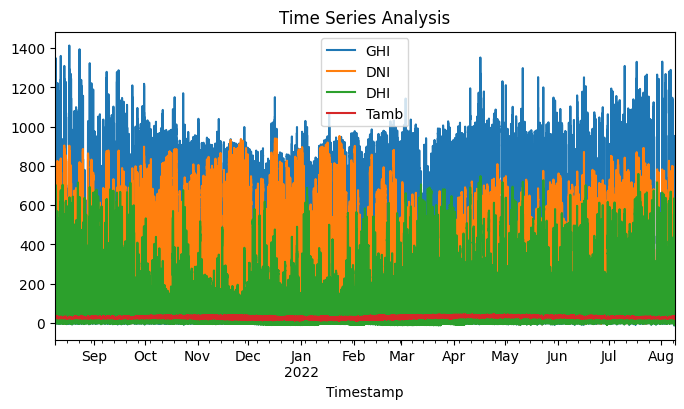

In [39]:
benin_data['Timestamp'] = pd.to_datetime(benin_data['Timestamp'])
benin_data.set_index('Timestamp', inplace=True)
benin_data[['GHI','DNI','DHI','Tamb']].plot(figsize=(8,4))
plt.title("Time Series Analysis")
plt.show()

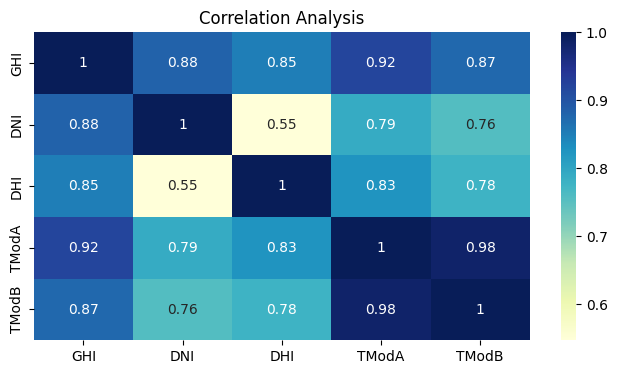

In [45]:
co_mtx=benin_data[['GHI', 'DNI', 'DHI','TModA','TModB']].corr(numeric_only='True')
fig, ax = plt.subplots(figsize=(8,4))  # Set the figure size
sns.heatmap(co_mtx,cmap="YlGnBu",annot=True, ax=ax)
plt.title('Correlation Analysis')
plt.show()

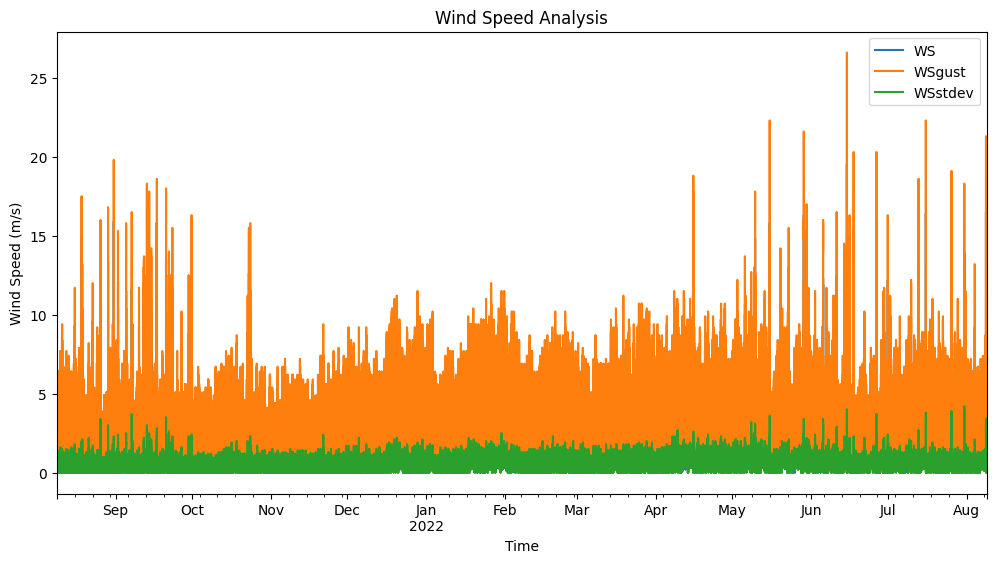

In [46]:
benin_data[['WS', 'WSgust', 'WSstdev']].plot(figsize=(12, 6))
plt.title('Wind Speed Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.show()

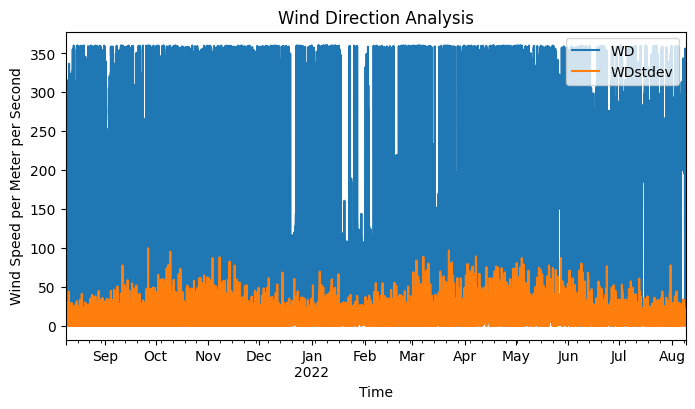

In [47]:
benin_data[['WD','WDstdev']].plot(figsize=(8,4))
plt.title('Wind Direction Analysis')
plt.xlabel('Time')
plt.ylabel('Wind Speed per Meter per Second')
plt.show()

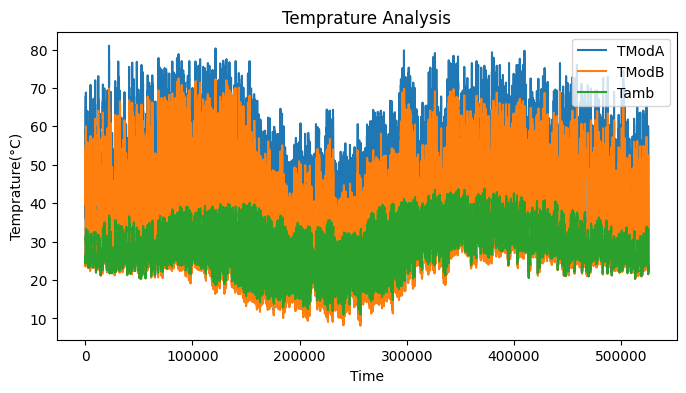

In [56]:
benin_data[['TModA', 'TModB', 'Tamb']].plot(figsize=(8,4))
plt.title('Temprature Analysis')
plt.xlabel('Time')
plt.ylabel('Temprature(°C)')
plt.show()

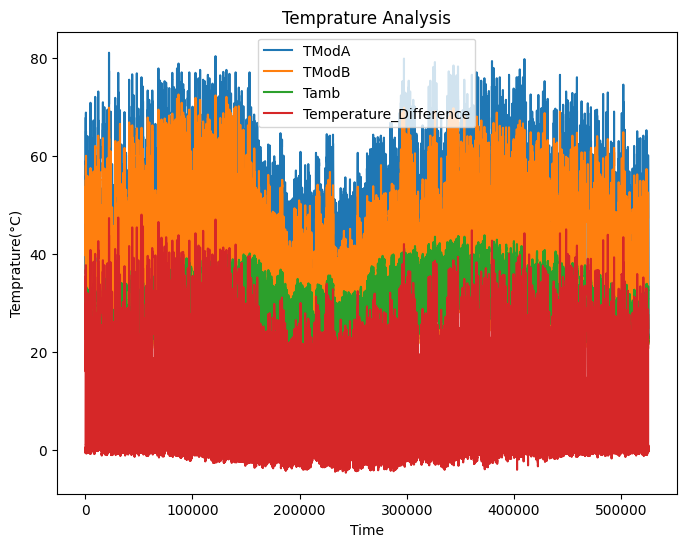

In [61]:
benin_data['Temperature_Difference'] = benin_data['TModA'] - benin_data['Tamb']
benin_data[['TModA', 'TModB', 'Tamb', 'Temperature_Difference']].plot(figsize=(8,6))
plt.title('Temprature Analysis')
plt.xlabel('Time')
plt.ylabel('Temprature(°C)')
plt.show()

Frequency Distribution


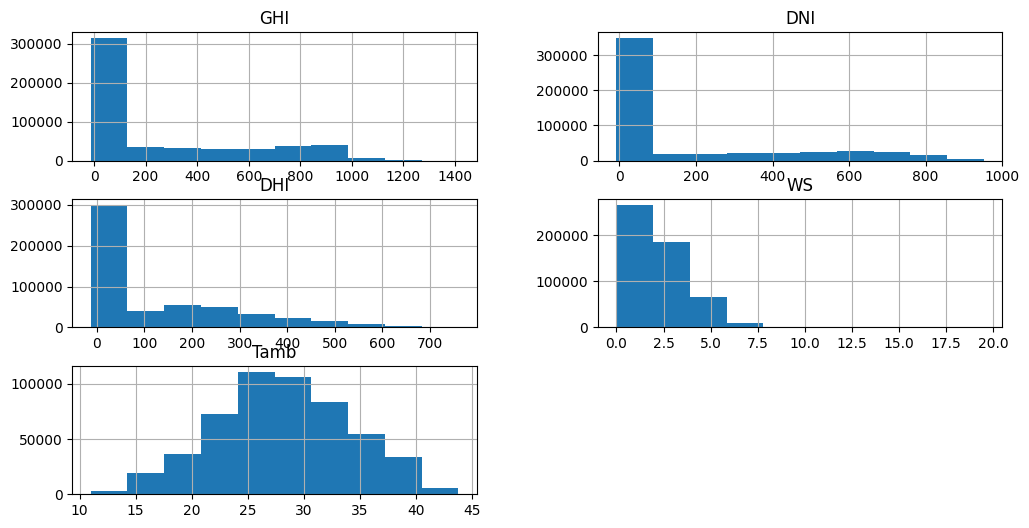

In [ ]:
benin_data[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins=10, figsize=(12, 6))
print("Frequency Distribution")
plt.show()

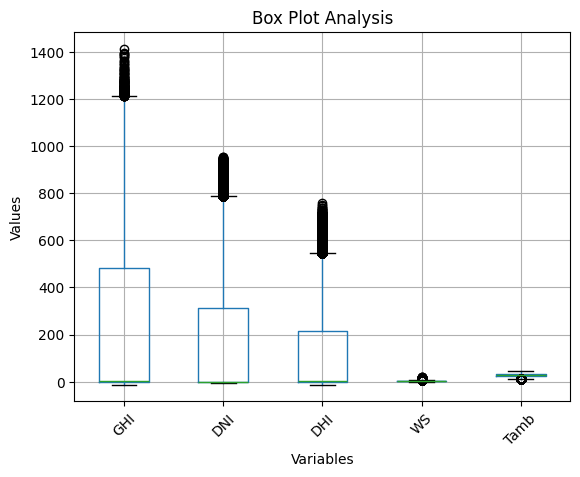

In [15]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = benin_data[variables]

# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

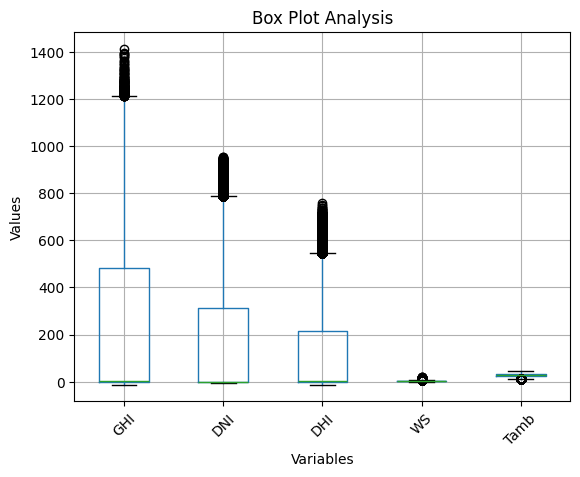

In [ ]:
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
selected_data = benin_data[variables]
# Creating a box plot for each variable
selected_data.boxplot()
plt.xticks(rotation=45)
plt.title('Box Plot Analysis')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.show()

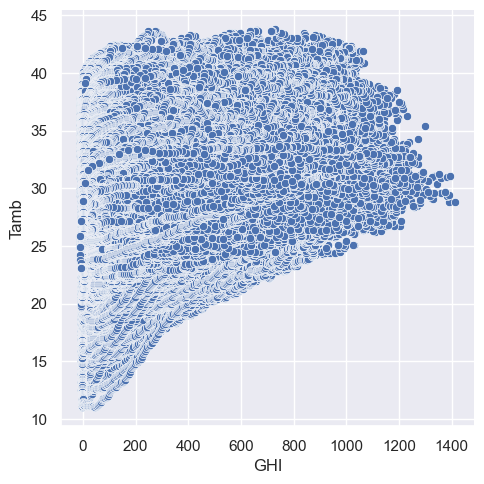

In [ ]:

#set grid style
sns.set(style="darkgrid")
sns.relplot(x="GHI",y="Tamb",data=benin_data)


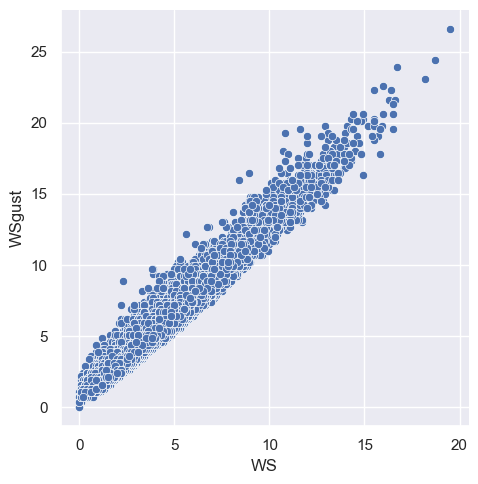

In [10]:
sns.set(style="darkgrid")
sns.relplot(x="WS",y="WSgust",data=benin_data)

'\nMissing Values:'

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

'\nCleaned Dataset:'

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,1.2,0.2,1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,
1,2021-08-09 00:02,1.1,0.2,1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,
2,2021-08-09 00:03,1.1,0.2,1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,
3,2021-08-09 00:04,1.1,0.1,1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,
4,2021-08-09 00:05,1.0,0.1,1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,


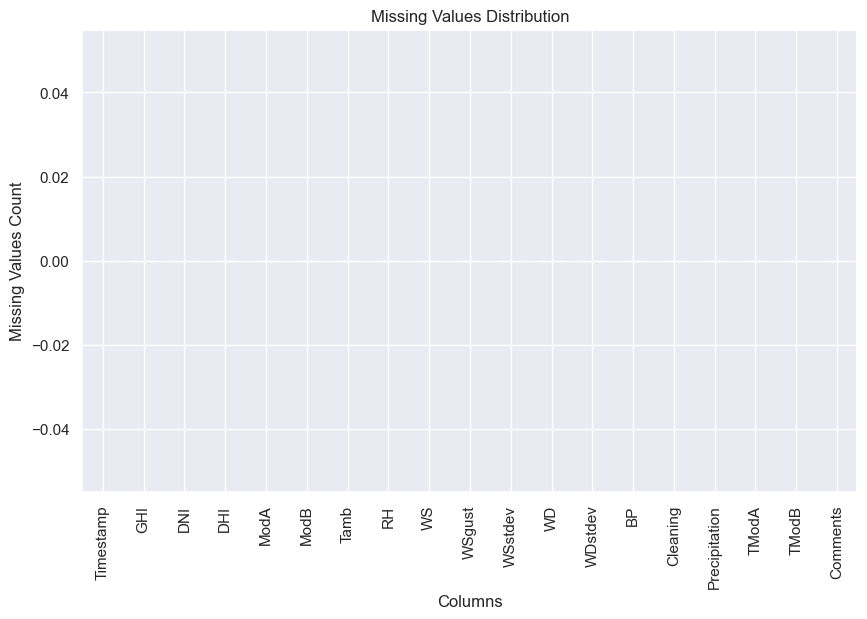

In [12]:
from IPython.display import display
# Check for missing values
display("\nMissing Values:")
display(benin_data.isnull().sum())

# Handling missing values
# Replace missing values in the "Comments" column with an empty string
benin_data["Comments"] = benin_data["Comments"].fillna("")

# Handling incorrect entries
# Remove the negative sign from negative values in "GHI", "DNI", and "DHI" columns
benin_data["GHI"] = benin_data["GHI"].abs()
benin_data["DNI"] =benin_data["DNI"].abs()
benin_data["DHI"] = benin_data["DHI"].abs()


# Display the cleaned dataset
display("\nCleaned Dataset:")
display (benin_data.head())

# Save the cleaned dataset to a new file
benin_data.to_csv("cleaned_benin_dataset.csv", index=False)

# Visualize the distribution of missing values
missing_values_count = benin_data.isnull().sum()
missing_values_count.plot(kind='bar', figsize=(10, 6))
plt.title("Missing Values Distribution")
plt.xlabel("Columns")
plt.ylabel("Missing Values Count")
plt.show()